In [ ]:
import pandas as pd
import numpy as np

In [628]:
file = 'titanic.csv'
df = pd.read_csv(file, index_col='PassengerId')
df.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [629]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [630]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [632]:
df_2 = df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
df_2.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,,
1,0,3,male,22.0,1,0,7.2500
2,1,1,female,38.0,1,0,71.2833
3,1,3,female,26.0,0,0,7.9250


In [634]:
df_2 = df_2.dropna()

In [635]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 1 to 891
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  714 non-null    int64  
 1   Pclass    714 non-null    int64  
 2   Sex       714 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     714 non-null    int64  
 5   Parch     714 non-null    int64  
 6   Fare      714 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 44.6+ KB


In [ ]:
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [636]:
df_2['Sex'].value_counts()

male      453
female    261
Name: Sex, dtype: int64

In [637]:
df_3 = df_2.copy()
df_3.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,,
1,0,3,male,22.0,1,0,7.2500
2,1,1,female,38.0,1,0,71.2833
3,1,3,female,26.0,0,0,7.9250
4,1,1,female,35.0,1,0,53.1000
5,0,3,male,35.0,0,0,8.0500


In [638]:
df_3['Survived'] = df_3['Survived'].map({0 : 'no', 1 : 'yes'})

In [639]:
df_3.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,,
1,no,3,male,22.0,1,0,7.2500
2,yes,1,female,38.0,1,0,71.2833
3,yes,3,female,26.0,0,0,7.9250


In [640]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 1 to 891
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  714 non-null    object 
 1   Pclass    714 non-null    int64  
 2   Sex       714 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     714 non-null    int64  
 5   Parch     714 non-null    int64  
 6   Fare      714 non-null    float64
dtypes: float64(2), int64(3), object(2)
memory usage: 44.6+ KB


In [641]:
groupby = df_3.groupby(['Sex'])
female, male = [groupby.get_group(x) for x in groupby.groups]

female_yes = female[female['Survived'] == 'yes']
female_no = female[female['Survived'] == 'no']

male_yes = male[male['Survived'] == 'yes']
male_no = male[male['Survived'] == 'no']

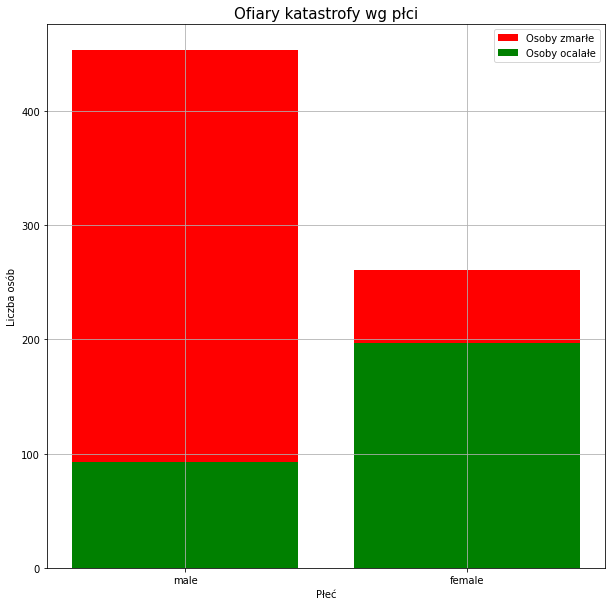

Liczba mężczyzn, którzy przeżyli: 93
Liczba mężczyzn, którzy nie przeżyli: 360
Liczba kobiet, które przeżyły: 197
Liczba kobiet, które nie przeżyły: 64


In [642]:
fig,ax = plt.subplots(figsize=(10,10))

ax.bar(male_no['Sex'], male_no['Sex'].count(), bottom=male_yes['Sex'].count(), color='r')
ax.bar(male_yes['Sex'], male_yes['Sex'].count(), color='g')

ax.bar(female_no['Sex'], female_no['Sex'].count(), bottom=female_yes['Sex'].count(), label='Osoby zmarłe', color='r')
ax.bar(female_yes['Sex'], female_yes['Sex'].count(), label='Osoby ocalałe', color='g')


ax.set_title('Ofiary katastrofy wg płci', fontsize='15')
ax.set_xlabel('Płeć')
ax.set_ylabel('Liczba osób')


plt.grid()
plt.legend()
plt.show()

print(f"Liczba mężczyzn, którzy przeżyli: {male_yes['Sex'].count()}")
print(f"Liczba mężczyzn, którzy nie przeżyli: {male_no['Sex'].count()}")
print(f"Liczba kobiet, które przeżyły: {female_yes['Sex'].count()}")
print(f"Liczba kobiet, które nie przeżyły: {female_no['Sex'].count()}")

In [643]:
df_3['Pclass'].value_counts()

3    355
1    186
2    173
Name: Pclass, dtype: int64

In [644]:
df_3['Pclass'] = df_3['Pclass'].map({3:'third', 1:'first', 2:'second'})
df_3.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,,
1,no,third,male,22.0,1,0,7.2500
2,yes,first,female,38.0,1,0,71.2833
3,yes,third,female,26.0,0,0,7.9250
4,yes,first,female,35.0,1,0,53.1000
5,no,third,male,35.0,0,0,8.0500


In [645]:
groupby_class = df_3.groupby(['Pclass'])
third, first, second = [groupby_class.get_group(x) for x in groupby_class.groups]

In [646]:
first_yes = first[first['Survived'] == 'yes']
first_no = first[first['Survived'] == 'no']

second_yes = second[second['Survived'] == 'yes']
second_no = second[second['Survived'] == 'no']

third_yes = third[third['Survived'] == 'yes']
third_no = third[third['Survived'] == 'no']

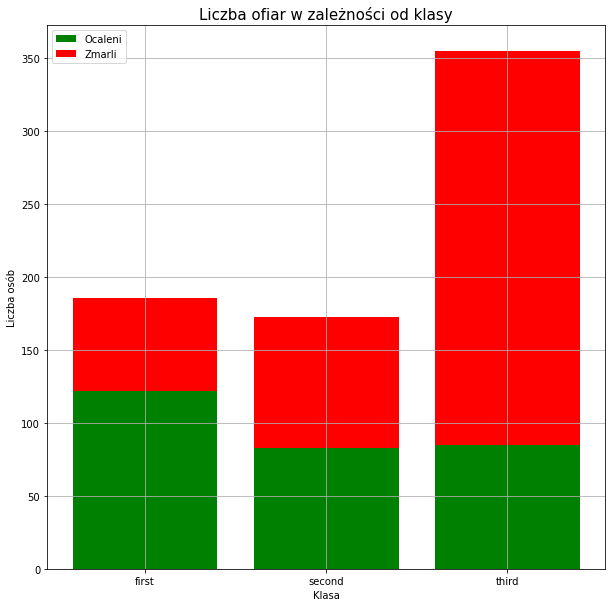

In [647]:
fig,ax = plt.subplots(figsize=(10,10))

ax.bar(third_yes['Pclass'], third_yes['Pclass'].count(), color='g')
ax.bar(third_no['Pclass'], third_no['Pclass'].count(), bottom=third_yes['Pclass'].count(), color='r')

ax.bar(first_yes['Pclass'], first_yes['Pclass'].count(), label='Ocaleni', color='g')
ax.bar(first_no['Pclass'], first_no['Pclass'].count(), bottom=first_yes['Pclass'].count(), label='Zmarli', color='r')

ax.bar(second_yes['Pclass'], second_yes['Pclass'].count(), color='g')
ax.bar(second_no['Pclass'], second_no['Pclass'].count(), bottom=second_yes['Pclass'].count(), color='r')

ax.set_title('Liczba ofiar w zależności od klasy', fontsize='15')
ax.set_xlabel('Klasa')
ax.set_ylabel('Liczba osób')

plt.grid()
plt.legend()
plt.show()

In [648]:
df_2_age = pd.DataFrame(df_2['Age'].value_counts())
df_2_age = df_2_age.rename(columns={'Age':'Age_number'})
df_2_age.head()

,Age_number
24.0,30
22.0,27
18.0,26
19.0,25
28.0,25


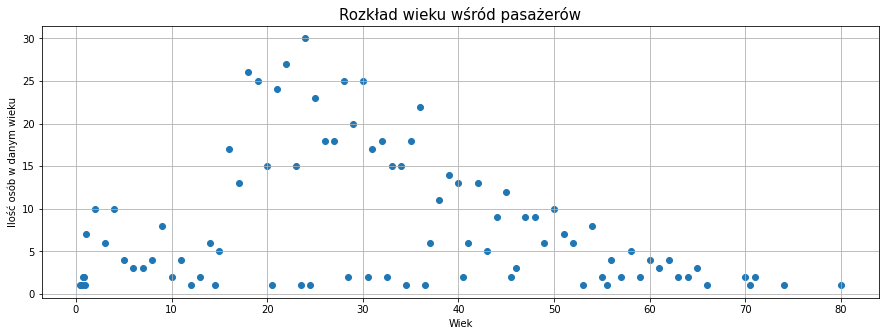

In [649]:
fig,ax = plt.subplots(figsize=(15,5))
ax.scatter(df_2_age.index, df_2_age['Age_number'])
                                    
ax.set_title('Rozkład wieku wśród pasażerów', fontsize='15')
ax.set_xlabel('Wiek')
ax.set_ylabel('Ilość osób w danym wieku')                                    

plt.grid()
plt.show()

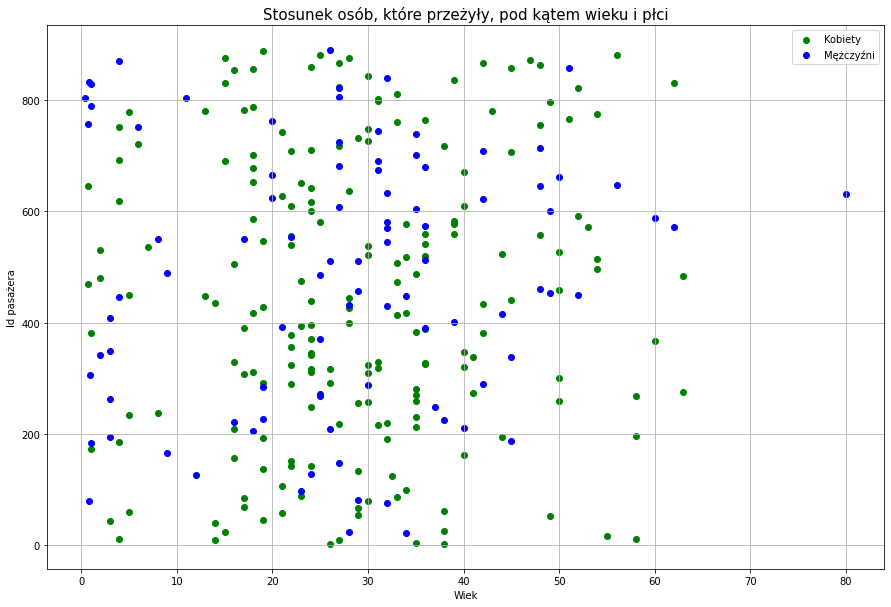

In [651]:
fig,ax = plt.subplots(figsize=(15,10))
                      
ax.scatter(female_yes['Age'], female_yes.index, label='Kobiety', color='green')
ax.scatter(male_yes['Age'], male_yes.index, label='Mężczyźni', color='blue')
                      
ax.set_title('Stosunek osób, które przeżyły, pod kątem wieku i płci', fontsize='15')
ax.set_xlabel('Wiek')
ax.set_ylabel('Id pasażera')

plt.legend()
plt.grid()
plt.show()

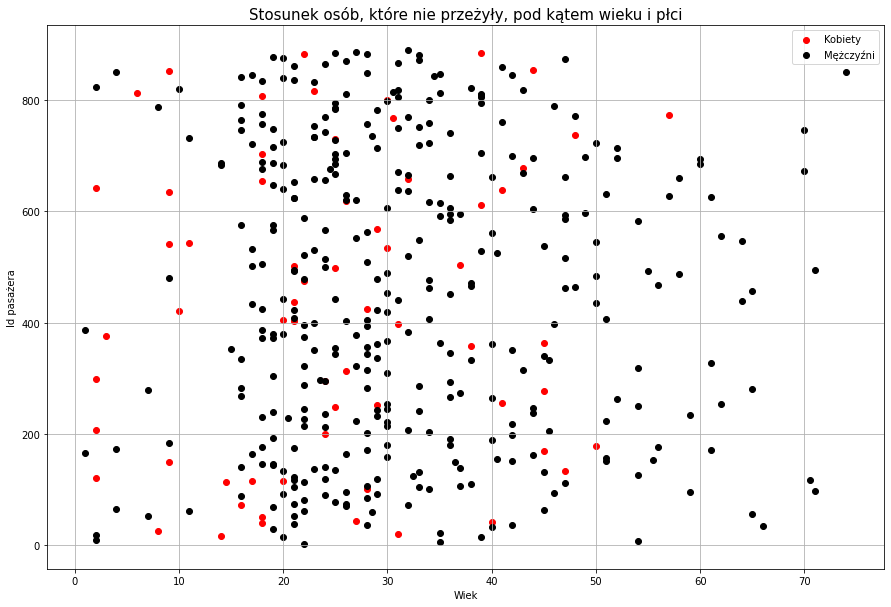

In [652]:
fig,ax = plt.subplots(figsize=(15,10))
                      
ax.scatter(female_no['Age'], female_no.index, label='Kobiety', color='red')
ax.scatter(male_no['Age'], male_no.index, label='Mężczyźni', color='black')

ax.set_title('Stosunek osób, które nie przeżyły, pod kątem wieku i płci', fontsize='15')
ax.set_xlabel('Wiek')
ax.set_ylabel('Id pasażera')

plt.legend()
plt.grid()                  
plt.show()

In [653]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [654]:
df_2['Sex'].value_counts()

male      453
female    261
Name: Sex, dtype: int64